<a href="https://colab.research.google.com/github/yassiSam/Resume/blob/master/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import graphviz

# Data Inspection

In [ ]:
df = pd.read_csv("ML_Project-Frockies-Extended.csv")

In [ ]:
df.describe()

,Discount Amount,Price
count,500.000000,500.00000
mean,11.030000,1411.02000
std,8.980557,204.63066
min,0.000000,1100.00000
25%,0.000000,1250.00000
50%,15.000000,1400.00000
75%,20.000000,1550.00000
max,20.000000,1750.00000


In [ ]:
df.head().transpose()

,0,1,2,3,4
Age range of customer,50-60,20-30,30-40,40-50,20-30
Color,Yellow,Green,Blue,Pink,Black
Material type,Cotton,Cotton,Denim,Cotton,Cotton
Discount Status,YES,YES,YES,YES,YES
Discount Amount,20,20,20,20,15
Price,1300,1400,1300,1100,1100
Price range,1250-1500,1250-1500,1250-1500,1000-1250,1000-1250
Sleeve pattern,Sleeveless,Short,Sleeveless,Short,Sleeveless
Material design,Floral,Plain,Dotted,Floral,Plain
Measurement type,Ready-made,Ready-made,Ready-made,Customized,Customized


In [ ]:
print(df.columns)

Index(['Age range of customer', 'Color', 'Material type', 'Discount Status',
       'Discount Amount', 'Price', 'Price range', 'Sleeve pattern',
       'Material design', 'Measurement type', 'Collar type',
       'Including a hairband or not',
       'Special features (Buttons/Hucks/Zippers/None)'],
      dtype='object')


In [ ]:
# Rename columns to make it easier to access and type
df.columns = df.columns.map(lambda col: col.replace(" ","_").lower())
df = df.rename(columns={
    "age_range_of_customer":"age_range",
    "discount_status":"is_discount",
    "including_a_hairband_or_not":"has_hairband",
    "special_features_(buttons/hucks/zippers/none)":"extra_features"
})
print(df.columns)

Index(['age_range', 'color', 'material_type', 'is_discount', 'discount_amount',
       'price', 'price_range', 'sleeve_pattern', 'material_design',
       'measurement_type', 'collar_type', 'has_hairband', 'extra_features'],
      dtype='object')


# Exploratory Data Analysis

There are 12 predictor variables with only two continous variable. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_range         500 non-null    object
 1   color             500 non-null    object
 2   material_type     500 non-null    object
 3   is_discount       500 non-null    object
 4   discount_amount   500 non-null    int64 
 5   price             500 non-null    int64 
 6   price_range       500 non-null    object
 7   sleeve_pattern    500 non-null    object
 8   material_design   500 non-null    object
 9   measurement_type  500 non-null    object
 10  collar_type       500 non-null    object
 11  has_hairband      500 non-null    object
 12  extra_features    500 non-null    object
dtypes: int64(2), object(11)
memory usage: 50.9+ KB


In [ ]:
for col in df.drop(["discount_amount","price"],axis="columns"):
    print(f"Value of counts of {col}\n")
    print(df[col].value_counts())
    print("\n")

Value of counts of age_range

30-40    185
20-30    136
40-50     89
50-60     60
60-70     30
Name: age_range, dtype: int64


Value of counts of color

Red       115
Yellow    103
Pink       84
Blue       63
Black      36
Green      32
White      23
Orange     22
Flower     15
Cream       7
Name: color, dtype: int64


Value of counts of material_type

Cotton    430
Denim      39
Linen      31
Name: material_type, dtype: int64


Value of counts of is_discount

YES    315
NO     185
Name: is_discount, dtype: int64


Value of counts of price_range

1250-1500    229
1500-1750    167
1000-1250    104
Name: price_range, dtype: int64


Value of counts of sleeve_pattern

Sleeveless    354
Short         146
Name: sleeve_pattern, dtype: int64


Value of counts of material_design

Floral    294
Check      84
Dotted     71
Plain      51
Name: material_design, dtype: int64


Value of counts of measurement_type

Ready-made    336
Customized    164
Name: measurement_type, dtype: int64


Value of cou

In [ ]:
for col in df.drop(["discount_amount","price","age_range"],axis="columns"):
    print(f"{col} and age_range tabulation\n")
    print(pd.crosstab(df[col],df.loc[:,"age_range"]))
    print("\n")

color and age_range tabulation

age_range  20-30  30-40  40-50  50-60  60-70
color                                       
Black         17      7      4      2      6
Blue           0     33     16     14      0
Cream          0      3      0      4      0
Flower         0      9      5      1      0
Green         20      6      1      2      3
Orange         0     13      5      4      0
Pink          55     13      2      3     11
Red            5     63     29     17      1
White          0     13      7      3      0
Yellow        39     25     20     10      9


material_type and age_range tabulation

age_range      20-30  30-40  40-50  50-60  60-70
material_type                                   
Cotton           136    149     73     42     30
Denim              0     23      8      8      0
Linen              0     13      8     10      0


is_discount and age_range tabulation

age_range    20-30  30-40  40-50  50-60  60-70
is_discount                                   
NO     

## Data Preprocessing

In [ ]:
y = df["age_range"]
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X = df.drop(["age_range"],axis="columns")
X_cat = df.drop(["discount_amount","price"],axis="columns")
X_num = df.loc[:,["discount_amount","price"]]
X = pd.concat([X_num,pd.get_dummies(X_cat)],axis="columns")

## Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(400, 41)
(100, 41)


In [ ]:
def evaluate_model(model,X_test,y_test):
    preds = model.predict(X_test)
    print(f"F! Score is {round(f1_score(y_test,preds,average='macro'),4)}")
    print(f"Accuracy is {round(accuracy_score(y_test,preds),4)}")
    print(f"Precision Score is {round(precision_score(y_test,preds,average='macro'),4)}")
    print(f"Recall Score is {round(recall_score(y_test,preds,average='macro'),4)}")
    print(confusion_matrix(y_test,preds))

## K Nearest Neighbours

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn_model.fit(X_train,y_train)

In [ ]:
evaluate_model(knn_model,X_test,y_test)

F! Score is 0.4898
Accuracy is 0.59
Precision Score is 0.6696
Recall Score is 0.4654
[[21  4  4  1  0]
 [ 5 29  1  1  0]
 [ 1 14  4  0  0]
 [ 1  4  0  4  0]
 [ 2  3  0  0  1]]


## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)

In [ ]:
evaluate_model(dt_model,X_test,y_test)

F! Score is 1.0
Accuracy is 1.0
Precision Score is 1.0
Recall Score is 1.0
[[30  0  0  0  0]
 [ 0 36  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  6]]


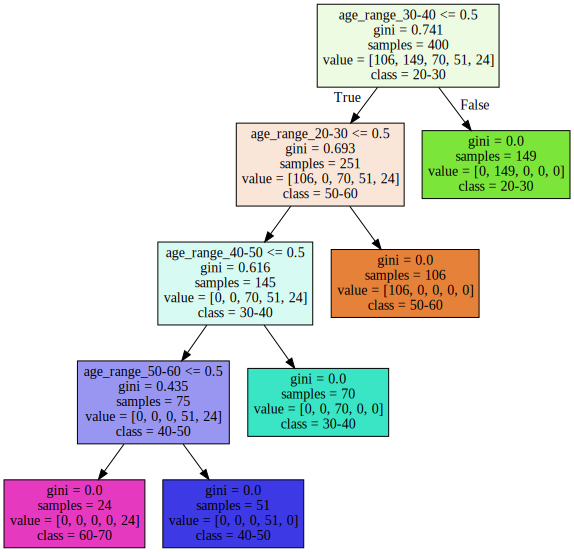

In [ ]:
fig = export_graphviz(dt_model, out_file = None,
                      feature_names=X.columns.values, class_names=df.age_range.unique(), filled=True)
graph = graphviz.Source(fig, format="png") 
graph